In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns


In [4]:
df_train = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(전처리).csv')
df_train['요양개시일자'] = df_train['요양개시일자'].apply(lambda x: int(str(x)[4:6])) 
df_train['요양개시계절'] = df_train['요양개시일자'].apply(lambda x: '봄' if x >= 3 and x <= 4 else '여름' if x >= 5 and x <= 8 else '가을' if x >= 9 and x <= 10 else '겨울')
df_train.drop(['요양개시일자'], axis = 1, inplace = True)
df_train.head()

,가입자 일련번호,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,요양개시계절
0,1,여성,55~59,전라남도,의과외래,정형외과,근골격계통 질환,근골격계통 질환,1,1,0.25,19240,9600,9640,0,겨울
1,1,여성,55~59,전라남도,의과외래,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,1,1,0.25,145680,72800,72880,0,여름
2,1,여성,55~59,전라남도,의과외래,내과,비뇨생식계통 질환,"내분비, 영양 및 대사질환",1,1,0.25,13240,6600,6640,3,가을
3,1,여성,55~59,전라남도,의과입원,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,7,21,0.25,861590,205810,655780,0,여름
4,1,여성,55~59,전라남도,의과외래,이비인후과,"눈, 귀의 질환",호흡계통의 질환,1,1,0.15,48440,14500,33940,3,봄


In [5]:
df_train_season = df_train[['서식코드', '요양개시계절']]

C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


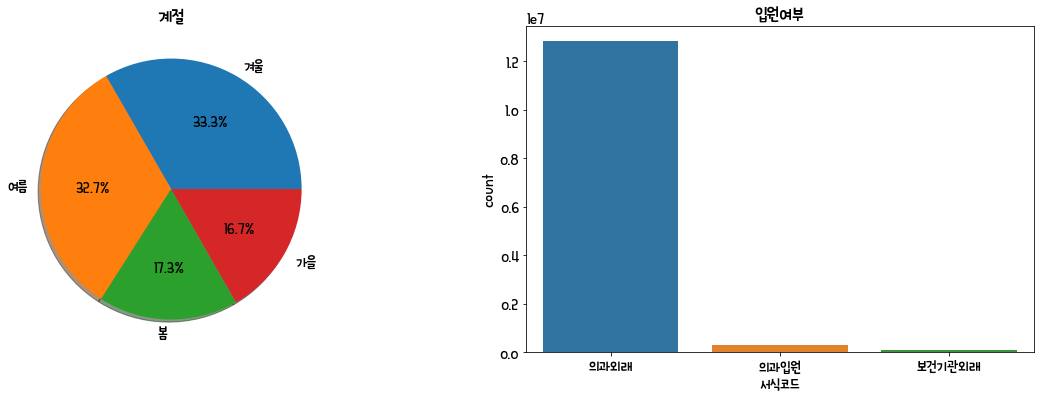

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rc('font', size = 15)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=20)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기

f, ax = plt.subplots(1, 2, figsize=(20, 6))

df_train_season['요양개시계절'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('계절(전체환자)')
ax[0].set_ylabel('')
sns.countplot('서식코드', data=df_train_season, ax=ax[1])
ax[1].set_title('입원여부')

plt.show()

C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


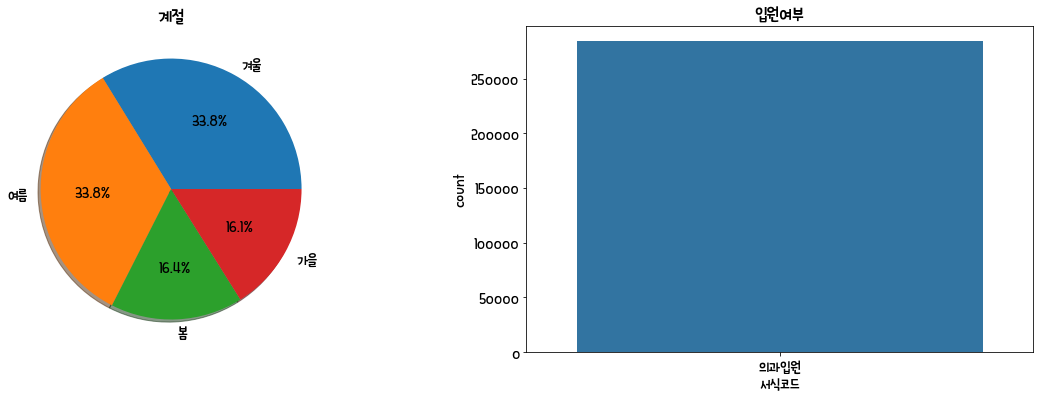

In [12]:
df_train_season1 = df_train_season[df_train_season['서식코드'] == '의과입원']
f, ax = plt.subplots(1, 2, figsize=(20, 6))

df_train_season1['요양개시계절'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('계절(입원환자)')
ax[0].set_ylabel('')
sns.countplot('서식코드', data=df_train_season1, ax=ax[1])
ax[1].set_title('입원여부')

plt.show()

C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


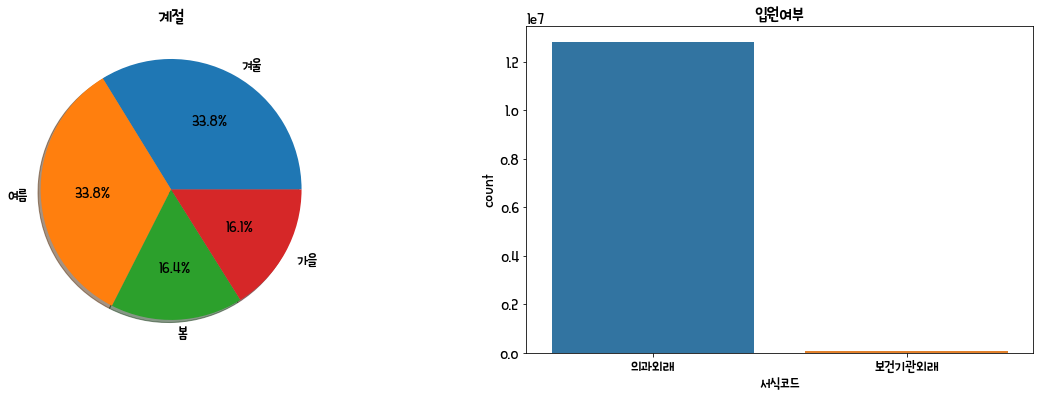

In [13]:
df_train_season2 = df_train_season[df_train_season['서식코드'] != '의과입원']
f, ax = plt.subplots(1, 2, figsize=(20, 6))

df_train_season1['요양개시계절'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('계절(비입원환자)')
ax[0].set_ylabel('')
sns.countplot('서식코드', data=df_train_season2, ax=ax[1])
ax[1].set_title('입원여부')

plt.show()